<a href="https://colab.research.google.com/github/kurtsenol/Text-Classification/blob/main/method_clf_sl_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install pickle5

     |████████████████████████████████| 133kB 4.0MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219259 sha256=4a8f68784fa9a87cf0df69d70639de70cb49317a6f58d1e4ce561f1ff6a0463f
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [3]:
import os
import numpy as np
import pandas as pd
import pickle5 as pickle
import re
import random

In [4]:
df_method =pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/df_method.pkl")
df_method

,JO,AU,TI,PY,DI,QUANTITATIVE,Method,category,CMB,CMV,MB,MV,MSD,MR,SR,SED,MED,TSM,TLD,PSM,MSM,A,C,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,0,phenomenology,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
with open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/df_all_final.pkl", "rb") as fh:
  df = pickle.load(fh)

In [6]:
df

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,\nMETHOD\nMeasures\nSignificant discrepant res...
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,\nMETHOD\nSample and Data Collection\nBecause ...
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,\nMETHOD\nData Collection\nManagement from 13 ...
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,\nMETHOD\nSample\nAn experimental design was e...


In [7]:
df.dropna(subset=["methodology"], inplace=True)

In [8]:
df

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,\nMETHOD\nMeasures\nSignificant discrepant res...
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,\nMETHOD\nSample and Data Collection\nBecause ...
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,\nMETHOD\nData Collection\nManagement from 13 ...
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,\nMETHOD\nSample\nAn experimental design was e...


In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df["PY"].fillna(2010, inplace=True)

In [11]:
df["PY"] = df.PY.astype("int")

In [12]:
df.isnull().sum()

JO              0
AU              0
TI              0
PY              0
DI              1
urls           83
filename       84
methodology     0
dtype: int64

In [13]:
df.drop_duplicates(subset="TI")

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3071,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010,10.1177/1096348009344234,NaN,NaN,\nMETHOD\nMeasures\nSignificant discrepant res...
3072,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010,10.1177/1096348009344235,NaN,NaN,\nMETHOD\nSample and Data Collection\nBecause ...
3073,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010,10.1177/1096348009349816,NaN,NaN,\nMETHOD\nData Collection\nManagement from 13 ...
3074,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010,10.1177/1096348009349817,NaN,NaN,\nMETHOD\nSample\nAn experimental design was e...


In [14]:
df_merged = pd.merge(df_method[["TI", "QUANTITATIVE", "Method"]], df, left_on="TI", right_on="TI")
df_merged

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology
0,Towards a hierarchy of hotel guests' in-room n...,0,phenomenology,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",2019,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,Barcelona's peer-to-peer tourist accommodation...,1,secondary data,IJCHM,"Benitez-Aurioles, B",2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,A meta-regression on the effect of online rati...,0,review,IJCHM,"Hu, XB; Yang, Y; Park, S",2019,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,Examining work factors after Malaysia's minimu...,1,survey,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,Seeking reward or avoiding risk from restauran...,1,experimental,IJCHM,"Kim, EL; Tanford, S",2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...,...,...
3071,"Attitudes, Perceptions, and Responses of Purch...",1,survey,JHMM,"Ong, BS",2015,10.1080/19368623.2014.901201,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_223.txt,\nMETHODOLOGY\nGiven that daily deals are Inte...
3072,Exploring the Antecedents of Hotel Customer Lo...,1,survey,JHMM,"de Leaniz, PMG; Rodriguez, IRD",2015,10.1080/19368623.2014.891961,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_224.txt,\nMETHOD OF ANALYSIS\nData Collection and Samp...
3073,Casual Dining on the French Riviera: Examining...,1,survey,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",2015,10.1080/19368623.2014.859114,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_225.txt,\nMETHODOLOGY\nThe Study Site\nThe French Rivi...
3074,The Influence of DMO Advertising on Specific D...,1,survey,JHMM,"Morosan, C",2015,10.1080/19368623.2014.891962,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_226.txt,\nMETHODOLOGY\nInstrument Development\nThe res...


In [15]:
df_merged.isnull().sum()

TI               0
QUANTITATIVE     0
Method           0
JO               0
AU               0
PY               0
DI               1
urls            83
filename        84
methodology      0
dtype: int64

In [16]:
df_merged.Method.value_counts()

survey               1511
secondary data        525
experimental          346
qualitative           177
mixed                 112
content analysis      104
case study             99
review                 76
scale development      38
bibliometric           18
grounded theory        16
phenomenology          15
theoretical            11
meta-analysis           7
ethnography             6
sna                     5
textual analysis        4
delphi                  3
field study             1
research note           1
interview               1
Name: Method, dtype: int64

In [17]:
df_filtered = df_merged.groupby("Method").filter(lambda x: len(x)>100)
df_filtered

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology
1,Barcelona's peer-to-peer tourist accommodation...,1,secondary data,IJCHM,"Benitez-Aurioles, B",2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
3,Examining work factors after Malaysia's minimu...,1,survey,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,Seeking reward or avoiding risk from restauran...,1,experimental,IJCHM,"Kim, EL; Tanford, S",2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
5,Prices of short-stay accommodation: time serie...,1,secondary data,IJCHM,"Gricar, S; Bojnec, S",2019,10.1108/IJCHM-01-2019-0091,https://www.emerald.com/insight/content/doi/10...,IJCHM_5.txt,Empirical setting\nIn terms of relevant econom...
6,How do online reviewers' cultural traits and p...,1,content analysis,IJCHM,"Mariani, M; Predvoditeleva, M",2019,10.1108/IJCHM-11-2018-0927,https://www.emerald.com/insight/content/doi/10...,IJCHM_7.txt,"3. Research setting, design and methodology\n3..."
...,...,...,...,...,...,...,...,...,...,...
3071,"Attitudes, Perceptions, and Responses of Purch...",1,survey,JHMM,"Ong, BS",2015,10.1080/19368623.2014.901201,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_223.txt,\nMETHODOLOGY\nGiven that daily deals are Inte...
3072,Exploring the Antecedents of Hotel Customer Lo...,1,survey,JHMM,"de Leaniz, PMG; Rodriguez, IRD",2015,10.1080/19368623.2014.891961,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_224.txt,\nMETHOD OF ANALYSIS\nData Collection and Samp...
3073,Casual Dining on the French Riviera: Examining...,1,survey,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",2015,10.1080/19368623.2014.859114,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_225.txt,\nMETHODOLOGY\nThe Study Site\nThe French Rivi...
3074,The Influence of DMO Advertising on Specific D...,1,survey,JHMM,"Morosan, C",2015,10.1080/19368623.2014.891962,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_226.txt,\nMETHODOLOGY\nInstrument Development\nThe res...


In [18]:
df_filtered = df_filtered[df_filtered.Method!="mixed"]

In [19]:
len(df_filtered)

2663

In [20]:
df_filtered.Method.value_counts()

survey              1511
secondary data       525
experimental         346
qualitative          177
content analysis     104
Name: Method, dtype: int64

In [21]:
df_filtered.Method.value_counts(normalize=True)

survey              0.567405
secondary data      0.197146
experimental        0.129929
qualitative         0.066466
content analysis    0.039054
Name: Method, dtype: float64

In [22]:
df_filtered.loc[:,'method_id'] = df_filtered['Method'].factorize()[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [23]:
df_filtered.head()

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology,method_id
1,Barcelona's peer-to-peer tourist accommodation...,1,secondary data,IJCHM,"Benitez-Aurioles, B",2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...,0
3,Examining work factors after Malaysia's minimu...,1,survey,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...,1
4,Seeking reward or avoiding risk from restauran...,1,experimental,IJCHM,"Kim, EL; Tanford, S",2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...,2
5,Prices of short-stay accommodation: time serie...,1,secondary data,IJCHM,"Gricar, S; Bojnec, S",2019,10.1108/IJCHM-01-2019-0091,https://www.emerald.com/insight/content/doi/10...,IJCHM_5.txt,Empirical setting\nIn terms of relevant econom...,0
6,How do online reviewers' cultural traits and p...,1,content analysis,IJCHM,"Mariani, M; Predvoditeleva, M",2019,10.1108/IJCHM-11-2018-0927,https://www.emerald.com/insight/content/doi/10...,IJCHM_7.txt,"3. Research setting, design and methodology\n3...",3


In [24]:
method_id_df = df_filtered[['Method', 'method_id']].drop_duplicates().sort_values('method_id')
method_to_id = dict(method_id_df.values)
method_to_id

{'content analysis': 3,
 'experimental': 2,
 'qualitative': 4,
 'secondary data': 0,
 'survey': 1}

In [25]:
id_to_method = dict(method_id_df[['method_id', 'Method']].values)
id_to_method

{0: 'secondary data',
 1: 'survey',
 2: 'experimental',
 3: 'content analysis',
 4: 'qualitative'}

* sublinear_df is set to True to use a logarithmic form for frequency.
* min_df is the minimum numbers of documents a word must be present in to be kept.
* norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
* ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
* stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [26]:
df_filtered.shape

(2663, 11)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=5, encoding='latin-1', ngram_range=(1, 2), stop_words='english',)

features = cv.fit_transform(df_filtered.methodology).toarray()
labels = df_filtered.method_id
features.shape

(2663, 44705)

Now, each of 2663 methodology sections is represented by 44705 features, representing the tf-idf score for different unigrams and bigrams.

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

In [29]:
X = df_filtered['methodology'] # Collection of documents
y = df_filtered['Method'] # Target or the labels we want to predict 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [30]:
clf1 = LGBMClassifier()
clf2 = LinearSVC(class_weight= 'balanced')
clf3 = SGDClassifier(class_weight= 'balanced')

In [31]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1),
    LinearSVC(class_weight= 'balanced', random_state=1),
    MultinomialNB(),
    LogisticRegression(class_weight= 'balanced', max_iter=10000, random_state=1),
    SGDClassifier(class_weight= 'balanced', random_state=1),
    DecisionTreeClassifier(random_state=1),
    LGBMClassifier(),
    BaggingClassifier(base_estimator=clf2, n_estimators=10, random_state=0),
    VotingClassifier(estimators=[('lgbm', clf1), ('lrsvc', clf2), ('sdg', clf3)], voting='hard'),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


In [32]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc.sort_values("Mean Accuracy")

,Mean Accuracy,Standard deviation
model_name,,
RandomForestClassifier,0.659410,0.010619
DecisionTreeClassifier,0.836647,0.012437
MultinomialNB,0.894088,0.021333
SGDClassifier,0.895967,0.020220
LogisticRegression,0.899356,0.013498
BaggingClassifier,0.899357,0.010886
LinearSVC,0.900486,0.013884
VotingClassifier,0.911368,0.017452
LGBMClassifier,0.913999,0.013949


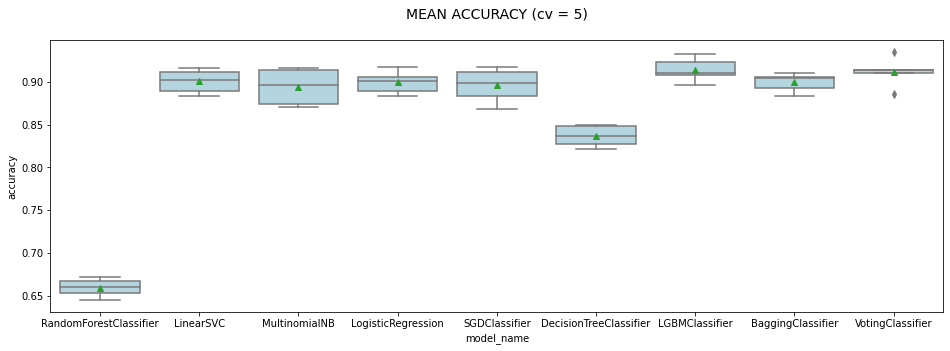

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [52]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df_filtered.index, test_size=0.25, 
                                                               random_state=21)
model = LinearSVC(C= 2, class_weight= 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(classification_report(y_test, y_pred, 
                                    target_names= df_filtered['Method'].unique()))
print("accuracy score: ", accuracy_score(y_test, y_pred))

				CLASSIFICATIION METRICS

                  precision    recall  f1-score   support

  secondary data       0.87      0.89      0.88       136
          survey       0.93      0.96      0.94       378
    experimental       0.85      0.84      0.84        74
content analysis       0.86      0.61      0.72        31
     qualitative       0.95      0.83      0.89        47

        accuracy                           0.91       666
       macro avg       0.89      0.83      0.85       666
    weighted avg       0.91      0.91      0.91       666

accuracy score:  0.9069069069069069


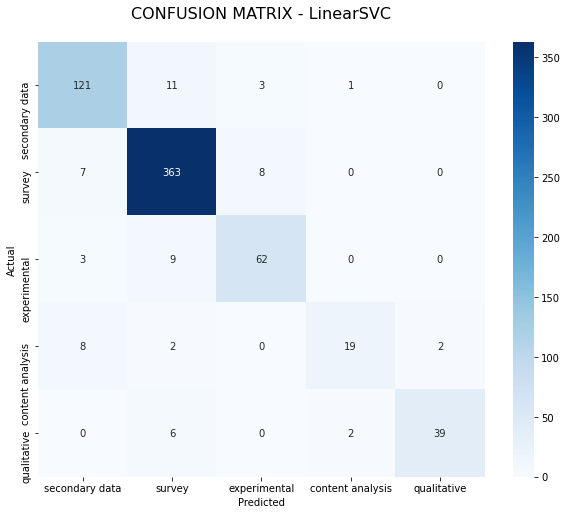

In [54]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=method_id_df.Method.values, 
            yticklabels=method_id_df.Method.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [55]:
from IPython.display import display
for predicted in method_id_df.method_id:
  for actual in method_id_df.method_id:
    if predicted != actual and conf_mat[actual, predicted] >= 5:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_method[actual], id_to_method[predicted], conf_mat[actual, predicted]))
      display(df_filtered.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Method', 'methodology']])
      print('')

'survey' predicted as 'secondary data' : 7 examples.


,Method,methodology
2206,survey,3. Methods\n3.1. Expenditure models\nAs previo...
1619,survey,2. Theoretical and empirical models\n2.1. Theo...
2472,survey,"Method\nIn this section, we describe our empir..."
962,survey,4. Research design\n4.1. Sample\nThe authors c...
657,survey,Method\nPopulation and sample\nThe target popu...
1951,survey,3. Materials and methods\n3.1. Data sources\nT...
960,survey,2. Methods\n2.1. Data\nA survey on overbooking...



'content analysis' predicted as 'secondary data' : 8 examples.


,Method,methodology
731,content analysis,2. Methodology\nThe data collection was conduc...
1006,content analysis,5. Method\n5.1. Data and sample\nFig. 1 summar...
143,content analysis,3. Methodology\nMonthly data from January 1996...
452,content analysis,3. Method\n3.1 Research instrument\nThe disclo...
1601,content analysis,3. Method\n3.1. Sample and data collection\nWi...
866,content analysis,3. Methodology\nIn line with a range of other ...
870,content analysis,Methodology\nICT-related publications in eight...
1177,content analysis,2. Data and results\nThe database is composed ...



'secondary data' predicted as 'survey' : 11 examples.


,Method,methodology
425,secondary data,Methodology\nData collection\nCouchSurfing.org...
2381,secondary data,Method\nData Source\nThe analysis below utiliz...
2736,secondary data,Study Method\nThis study is part of a multipha...
1648,secondary data,3. Method\n3.1. Sample\nThe database was creat...
1840,secondary data,3. Methodology\nIn an effort to explore the ap...
777,secondary data,3. Data\nTo address the questions raised by th...
729,secondary data,3. Methodology\nThe survey of this study was c...
1688,secondary data,4. Methodology\n4.1. Research design\nIn the c...
196,secondary data,"3. Methodology\nTo test the hypotheses, an emp..."
878,secondary data,3. Data\nThe data for this study were obtained...



'experimental' predicted as 'survey' : 9 examples.


,Method,methodology
2849,experimental,\nMETHOD\nBusiness students at a commuter coll...
1821,experimental,3. Data and methods\nIn order to examine the r...
1374,experimental,2. Materials and methods\n2.1. Description of ...
35,experimental,Method\nSample\nIn order to test our hypothese...
1571,experimental,3. Methodology\n3.1. Procedure and measures\nT...
1091,experimental,3. Methodology\n3.1. Procedure and measure\nTo...
398,experimental,3. Methodology\n3.1 Pilot studies\nThe pilot s...
1285,experimental,3. Methodology\nThis study is designed to exam...
1368,experimental,3. Method\n3.1. Event context\nThis study seek...



'qualitative' predicted as 'survey' : 6 examples.


,Method,methodology
2634,qualitative,Method\nStudy Context\nThe rural and agricultu...
1193,qualitative,2. Overview of past empirical research\nAlthou...
892,qualitative,Methodology\nThe purpose of this study is to u...
2365,qualitative,Method\nSample and Procedures\nBased on the be...
685,qualitative,Methods\nResearch site\nTo verify the applicab...
2407,qualitative,Research Approach\nTo examine and quantify the...



'survey' predicted as 'experimental' : 8 examples.


,Method,methodology
2277,survey,Study\nWe tested our hypotheses using data fro...
1931,survey,3. Methodology\n3.1. Participants\nThe partici...
664,survey,Empirical study\nTo examine whether waiting li...
802,survey,2. Methodology\nThe dynamics of the research i...
1970,survey,3. Methodology\nThe study was conducted during...
2885,survey,Study 1\nWe first conducted two pretests to ch...
134,survey,4. Methods\n4.1 Single-event buyers of premium...
1841,survey,3. Methods\n3.1. Conceptualization\nThe model ...


In [56]:
df_filtered.loc[2731]["methodology"]

'Method\nSample and Procedure\nData consisted of self-reports from members of the top hotel loyalty programs (Hilton Honors, Starwood Preferred Guest, Marriott Rewards, Hyatt Gold Passport, and Accor) posted on flyertalk.com from January to June 2011. This popular interactive website features discussions and chat boards that cover up-to-date travel information for all travelers—from leisure to business. Members of this website have posted nearly one million comments regarding hospitality loyalty programs. The sample included more than 30,000 lines of text and was taken from the most recent post to the oldest post within the time period for each program until saturation was reached. A theoretical sampling method (Glaser & Strauss, 1967) was used to develop an exhaustive set of categories. Theoretical sampling differs from statistical sampling, since the process is iterative and driven by the categories that emerge. It may require different sample sizes to exhaust each category. It is vi

In [57]:
model.fit(features, labels)

N = 5
for Method, method_id in sorted(method_to_id.items()):
  indices = np.argsort(model.coef_[method_id])
  feature_names = np.array(cv.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("\n==> '{}':".format(Method))
  print("  * Top unigrams: %s" %(', '.join(unigrams)))
  print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'content analysis':
  * Top unigrams: content, comments, reviews, tripadvisor, reviewer
  * Top bigrams: content analysis, hospitality marketing, marketing research, booking com, al 2006

==> 'experimental':
  * Top unigrams: experimental, experiment, scenario, vs, eye
  * Top bigrams: experimental design, independent variables, trade offs, conjoint analysis, new service

==> 'qualitative':
  * Top unigrams: interviews, interview, approach, narrative, researchers
  * Top bigrams: hotel sector, employees hotel, semi structured, interviews conducted, responses assessed

==> 'secondary data':
  * Top unigrams: periods, database, ethics, operating, use
  * Top bigrams: used study, time series, al 2016, al 2010, new york

==> 'survey':
  * Top unigrams: survey, questionnaires, reported, surveys, questionnaire
  * Top bigrams: data collected, research instrument, developed tested, errors associated, data collection


In [58]:
fitted_vectorizer = cv.fit(df_filtered.methodology)

In [59]:
n=-6

In [60]:
txt =df_filtered.methodology.iloc[n]
txt

'\nMETHODOLOGY AND ANALYSIS\nModel Specification and Data Source\nThis study is based on the small island of Mauritius for the period 1979 to 2010. The economic model used pertains to an estimation of a demand function for international tourism, augmented in the present case by a proxy for tourism promotion and is consistent with the general literature (see Witt & Witt, 1995; Lim, 1997; Nordstom, 2002; Eilat & Eilav, 2004, Naude & Saayman, 2004) and particularly with that used by Khadaroo and Seetanah (2007) for the case of island economies. Thus, the function specified is as follows:\n(1)\n\nThe dependent variable TR1 (tourist arrivals per annum) is the measure of the demand for tourism to Mauritius and was obtained from the national Central Statistical Office.\n\nBased on existing literature, total tourism expenditures and relative tourism prices are among the crucial factors in the tourism demand equation. Following the literature (see Nordstom, 2002 and Naude & Saayman, 2004, in pa

In [61]:
df_filtered.Method.iloc[n]

'secondary data'

In [62]:
print(model.predict(fitted_vectorizer.transform([txt])))

[0]


In [63]:
id_to_method

{0: 'secondary data',
 1: 'survey',
 2: 'experimental',
 3: 'content analysis',
 4: 'qualitative'}

In [64]:
text="""
RESEARCH METHOD
Data Collection and Sample Description
The data were provided by Außenwirtschaft Österreich,
a branch of the Austrian Chamber of Commerce that
supports export efforts, and consisted of 194 exporting
firms that had completed an online questionnaire; the
respondents were all senior executives (e.g., chief executive
officers, export directors, export department heads)
with direct responsibility for export decisions. We
excluded 21 firms because of poorly completed questionnaires,
resulting in 173 fully usable responses. Of
the responding companies, 80% were independent companies
(either privately owned or public limited companies),
and 12% were part of a global company; the rest
had other corporate structures. Half the companies were
founded in the preceding 20 years, and their export
experience ranged from 1 to 125 years, with a median
of 12 (M = 20, SD = 21) years. On average, the firms
had 191 full-time employees (range from 1 to 7,800).
Almost all (95%) exported to the European Union, 64%
to other European countries, 38% to Asia, 36% to
Africa and/or the Middle East, 29% to North America,
20% to South or Central America, and 19% to Australia
and/or New Zealand. Half the companies
exported to 10 countries or fewer (M = 20, SD = 25),
and the average export dependence (i.e., export-to-total
sales ratio) was 53% (SD = 33%).
To judge the representativeness of our sample, we compared
it with official statistical data on exporting.
According to Statistik Austria, the national statistics
office, 43% of all Austrian exporters sell to a single
country only; however, the volume of exports accounted
for by this group is only 2% (Hodel 2004, 2012). This
group is of little relevance for the current study because
firms with a single export destination are unlikely to
engage in systematic segmentation activities (or to participate
in a study on export segmentation). This is
indeed reflected in the composition of our sample: only
2% of the respondent firms export to a single country
only. The majority of our respondents export to
between 2 and 19 countries (66%) and the rest (32%)
to 20+ countries. The corresponding groups in the
population are 52% and 6% and account for 30% and
68% of all exports, respectively (Hodel 2012). Thus,
our sample seems well representative of the Austrian
companies that are responsible for the bulk of the country’s
export activity and for which export segmentation
is likely to be important, considering the large number
of export markets served.4
Construct Measurement
Table 2 lists the measurements of all constructs in our
model, together with relevant psychometric information.
We measured firm size by the log-transformed number of
employees (Erramilli 1991), export experience by the
years a firm has been exporting (Winklhofer and Diamantopoulos
2002), export dependence as the exportto-
total sales ratio (Diamantopoulos and Inglis 1988;
Katsikeas 1994), export diversity by the number of
countries to which a firm exports (Dhanaraj and
Beamish 2003),5 and export market turbulence according
to Jaworski and Kohli’s (1993) well-established
scale.
For export segmentation commitment, we developed
our own five-item scale, which captured managers’ attitudes
and behavior toward the market segmentation
process. For export segmentation strategy, we itemized
the three strategic options and asked respondents to
specify their agreement with each option. This approach
acknowledges that the fit of the strategy with its context
is critical (Hultman, Robson, and Katsikeas 2009). We
specified segmentation bases as the number of distinct
segmentation variables the firm used (based on a checklist
of 21 criteria for segmenting business-to-consumer
markets and 14 criteria for segmenting business-tobusiness
markets).
For export segmentation effectiveness, we adapted the
basic four-dimensional structure developed by Foedermayr
and colleagues (Foedermayr and Diamantopoulos
2008a; Foedermayr, Diamantopoulos, and Sichtmann
2009), which consisted of targeting performance, positioning
performance, adaptability to change, and cost
reduction.6 Originally, the dimensions were operationalized
with formative indicators; however, the majority of
items under each dimension in the original model seem
to share a common cause, which suggests that reflective
measurement is more appropriate. The psychometric
properties shown in Table 2 strongly support this measurement
respecification.
For strategic export performance and financial export
performance, we adapted items from Zou and Cavusgil
(2002) and Zou, Taylor, and Osland (1998). The indicators
for strategic export performance are export market
share and rate of new market entry, and export financial
performance consists of export sales, export profits, and
export growth. Customer satisfaction comprises three
items about offerings, how consumers are treated, and
how their complaints have been handled. Consistent
with other investigations of export performance (e.g.,
Hooley et al. 2005; Hultman, Robson, and Katsikeas
2009; Morgan, Kaleka, and Katsikeas 2004), we relied
on self-reported measures.

"""

In [65]:
print(model.predict(fitted_vectorizer.transform([text])))

[0]
